In [1]:
# change to `%matplotlib` for interactive methods
%matplotlib inline

from imgseries import ImgSeries, GreyLevel, GreyLevelResults

# Define image series to work on

In [2]:
basefolder = Path('data')
folders = [basefolder / folder for folder in ('img1', 'img2')]
images = ImgSeries(folders, savepath=basefolder)

# Minimal analysis

In [3]:
gl = GreyLevel(images)

The line below assumes that analysis zones have already been defined and saved in the metadata file (see details further below)

In [4]:
gl.regenerate()

<AxesSubplot:title={'center':'Analysis Zones (img #0)'}>

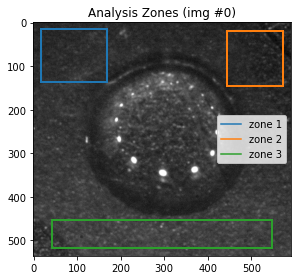

In [5]:
gl.zones.show()

Now, run analysis on these zones.

In [6]:
gl.run()

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.09it/s]


Note that for large numbers of images, it can be faster to distribute computation across multiple computer cores:

In [7]:
gl.run(parallel=True)  # has some startup delay due to multiprocessing initiation

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:08<00:00,  5.71it/s]


Results are stored in the `results.data` attribute, which is a pandas DataFrame (times are automatically extracted from image creation date, but can be modified, see further below)) 

In [8]:
gl.results.data.head()

,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
0,img1,img-00610.png,1.599832e+09,69.861462,62.143014,88.134096
1,img1,img-00611.png,1.599832e+09,69.754513,62.061832,88.122558
2,img1,img-00612.png,1.599832e+09,69.777077,62.105780,88.175946
3,img1,img-00613.png,1.599832e+09,69.659798,62.014832,88.102289
4,img1,img-00614.png,1.599832e+09,69.659037,62.016725,88.065293


In [19]:
gl.animate()

In [20]:
gl.inspect()

Plot grey level of every zone as a function of time:

<AxesSubplot: xlabel='time (unix)'>

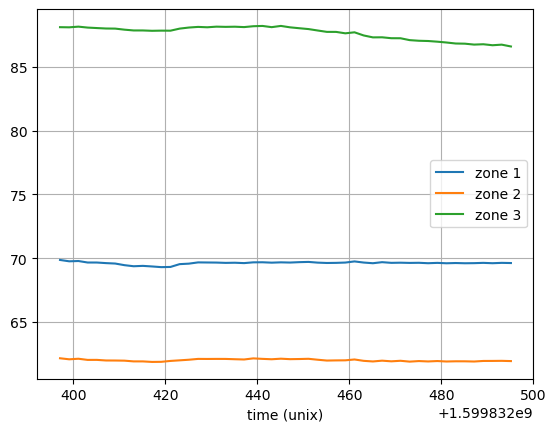

In [11]:
gl.results.data.set_index('time (unix)').filter(like='zone').plot(grid=True)

Save data in a tsv (tab-separated value) file, using default filename (filename can be set as a parameter if necessary, see further below). Metadata including zone info, path info, and code version info is also saved in a .json file at the same time. 

Before saving, make sure the timing info is correct for all images. If not, correct timing info, re-run the analysis, and call `results.save()`.

In [12]:
gl.results.save()

# Defining and viewing analysis zones

Zone defining has to be done at least once.

**Important**: Matplotlib must be in an interactive mode to do so.

Defining does not need to be done again in the following situations:
- calling methods again from the same `gl` object, e.g. `gl.run()`
- calling `gl.zones.load()` or `gl.regenerate()` to load zones data from saved metadata (.json) file.

In [9]:
gl.zones.define()  # define one zone using the first image of the series

In [10]:
gl.zones.define(3)  # define 3 zones using the first image of the series

In [6]:
gl.zones.define(3, num=10)  # define 3 zones using image #10 in the series

In [12]:
gl.zones.define(3, draggable=True)  # define 3 zones using draggable rectangles instead of clicks

Viewing analysis zones after defining or loading them:

In [11]:
gl.zones.data

{'zone 1': [18, 15, 152, 121],
 'zone 2': [444, 19, 129, 127],
 'zone 3': [44, 454, 504, 65]}

In [12]:
gl.zones.show(33)  # show zones on 33th image of series

<AxesSubplot: title={'center': 'Analysis Zones (img #33)'}>

**Note**: At the moment, saving zones data is done by calling `gl.save()`, which saves both data and metadata. Be careful because calling `gl.save()` also overwrites saved analysis data (potentially with no data if no analysis has been run yet). This makes sure that metadata in .json files actually corresponds to the data in the .tsv file.

# Analyze only subset of images

In [11]:
gl.run(start=10)  # Analyze only from image #10
gl.results.data.head()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 48.25it/s]


,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
10,img1,img-00620.png,1.599832e+09,69.350315,61.856314,87.849756
11,img1,img-00621.png,1.599832e+09,69.297303,61.864005,87.862515
12,img1,img-00622.png,1.599832e+09,69.311712,61.934322,87.858669
13,img1,img-00623.png,1.599832e+09,69.532514,61.980773,88.021184
14,img1,img-00624.png,1.599832e+09,69.571009,62.028444,88.105708


In [12]:
gl.run(end=25)  # Analyze only up to image #25, not included
gl.results.data.tail()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 41.77it/s]


,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
20,img1,img-00630.png,1.599832e+09,69.613093,62.047305,88.140324
21,img1,img-00631.png,1.599832e+09,69.673227,62.133492,88.208303
22,img1,img-00632.png,1.599832e+09,69.678936,62.095953,88.231166
23,img1,img-00633.png,1.599832e+09,69.648380,62.065739,88.135928
24,img1,img-00634.png,1.599832e+09,69.673173,62.109687,88.232692


In [13]:
gl.run(skip=5)  # Analyze only every 5-th image
gl.results.data.head()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.83it/s]


,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
0,img1,img-00610.png,1.599832e+09,69.861462,62.143014,88.134096
5,img1,img-00615.png,1.599832e+09,69.612766,61.969603,88.029915
10,img1,img-00620.png,1.599832e+09,69.350315,61.856314,87.849756
15,img1,img-00625.png,1.599832e+09,69.669367,62.093512,88.155311
20,img1,img-00630.png,1.599832e+09,69.613093,62.047305,88.140324


# Load analysis data a posteriori

## Load results without images

In [8]:
results = GreyLevelResults(savepath=basefolder)

In [9]:
results.load()
results.data.head()

,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
0,img1,img-00610.png,1.599832e+09,69.861462,62.143014,88.134096
1,img1,img-00611.png,1.599832e+09,69.754513,62.061832,88.122558
2,img1,img-00612.png,1.599832e+09,69.777077,62.105780,88.175946
3,img1,img-00613.png,1.599832e+09,69.659798,62.014832,88.102289
4,img1,img-00614.png,1.599832e+09,69.659037,62.016725,88.065293


In [10]:
results.metadata

{'path': 'C:\\Users\\olivier.vincent\\Python-OV\\imgseries\\data',
 'folders': ['img1', 'img2'],
 'zones': {'zone 1': [18, 15, 152, 121],
  'zone 2': [444, 19, 129, 127],
  'zone 3': [44, 454, 504, 65]},
 'rotation': {'angle': -0.3425123582361368},
 'crop': {'zone': [10, 8, 591, 536]},
 'time (utc)': '2023-01-30 18:04:02',
 'code version': {'skimage': {'status': 'not a git repository',
   'tag': 'v0.19.3'},
  'imgseries': {'hash': 'e30097a0afdf2d7d20fd8f060a1e5a5d107b0bd3',
   'status': 'dirty',
   'tag': 'v0.4.0'},
  'imgbasics': {'hash': '3f468b4021be56679a448bea57a229fc34c6721d',
   'status': 'clean',
   'tag': 'v0.3.0'},
  'filo': {'status': 'not a git repository', 'tag': 'v1.1.5'},
  'matplotlib': {'status': 'not a git repository', 'tag': 'v3.6.3'},
  'numpy': {'status': 'not a git repository', 'tag': 'v1.24.1'}}}

## Connect results to image series (e.g. for inspection/visualization)

In [11]:
images = ImgSeries(folders, savepath=basefolder)
gl = GreyLevel(images)
gl.regenerate()

In [12]:
print('Image Crop -----------------------', gl.img_series.crop.zone)
print('Image Crop (same as above) -------', gl.results.metadata['crop']['zone'])
print('')
print('Image Rotation -------------------', gl.img_series.rotation.data)
print('Image Rotation (same as above) ---', gl.results.metadata['rotation'])
print('')
print('Analysis Zones -------------------', gl.zones.data['zone 2'])
print('Analysis Zones (same as above) ---', gl.results.metadata['zones']['zone 2'])

gl.results.data.head()

Image Crop ----------------------- [10, 8, 591, 536]
Image Crop (same as above) ------- [10, 8, 591, 536]

Image Rotation ------------------- {'angle': -0.3425123582361368}
Image Rotation (same as above) --- {'angle': -0.3425123582361368}

Analysis Zones ------------------- [444, 19, 129, 127]
Analysis Zones (same as above) --- [444, 19, 129, 127]


,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
0,img1,img-00610.png,1.599832e+09,69.861462,62.143014,88.134096
1,img1,img-00611.png,1.599832e+09,69.754513,62.061832,88.122558
2,img1,img-00612.png,1.599832e+09,69.777077,62.105780,88.175946
3,img1,img-00613.png,1.599832e+09,69.659798,62.014832,88.102289
4,img1,img-00614.png,1.599832e+09,69.659037,62.016725,88.065293


Once the analysis is regenerated, all the tools associated with images (inspection, showing, animation, etc.) are available:

In [13]:
gl.show(num=25)

<Axes: title={'center': 'img #25'}>

In [32]:
gl.inspect()

# Load / save with custom filenames

Loading and saving data can accept custom filenames as arguments, without extensions (they are added automatically, with `.tsv` for analysis data, and `.json` for metadata, e.g. (lines below should follow a `gl.run()` so that `gl.results.data` is defined):

In [14]:
gl.results.save('Img_GreyLevel_SavingTest')  # generates both .json and .tsv files

In [15]:
gl.results.load('Img_GreyLevel_SavingTest')  # loads from .tsv file
gl.results.data.head()

,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
0,img1,img-00610.png,1.599832e+09,69.861462,62.143014,88.134096
1,img1,img-00611.png,1.599832e+09,69.754513,62.061832,88.122558
2,img1,img-00612.png,1.599832e+09,69.777077,62.105780,88.175946
3,img1,img-00613.png,1.599832e+09,69.659798,62.014832,88.102289
4,img1,img-00614.png,1.599832e+09,69.659037,62.016725,88.065293
